Project 1 - a miniature project attempting to accurately predict iris types in flowers using the famour Iris dataset and classification models.

In [ ]:
##Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_palette('husl')

In [ ]:
##EDA

dataset = pd.read_csv('/content/iris.data', header = None)
dataset.columns = names = ["Sepal Length","Sepal Width","Petal Length","Petal Width","Iris Type"]

In [ ]:
dataset.head()


,Sepal Length,Sepal Width,Petal Length,Petal Width,Iris Type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
dataset.describe()


,Sepal Length,Sepal Width,Petal Length,Petal Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
dataset['Iris Type'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Iris Type, dtype: int64

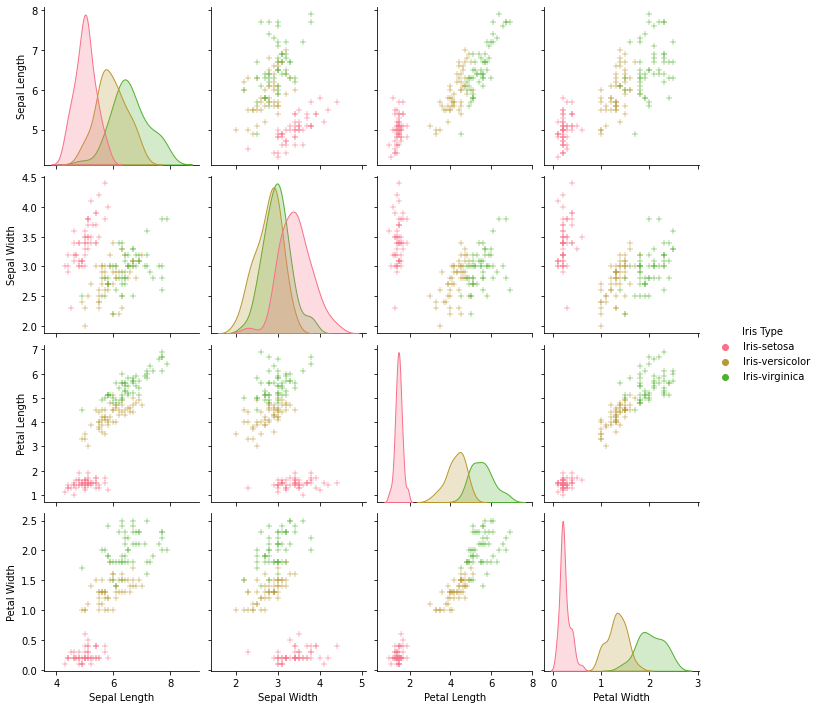

In [ ]:
viz = sns.pairplot(dataset, hue='Iris Type', markers = '+')
plt.show()

note above the pairwise relationship between features of the Setose iris is distinguished from the relationships of the other two. Also in violin plots, versicolor and virginica tending somewhat to be close with one another while distinct from setosa - particularly in Sepal width


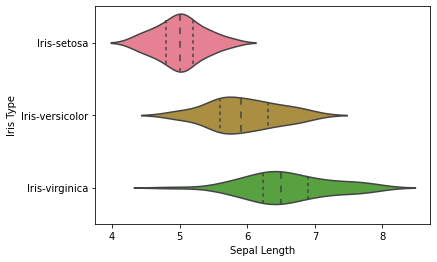

In [ ]:
a = sns.violinplot(y='Iris Type', x='Sepal Length', data=dataset, inner='quartile')


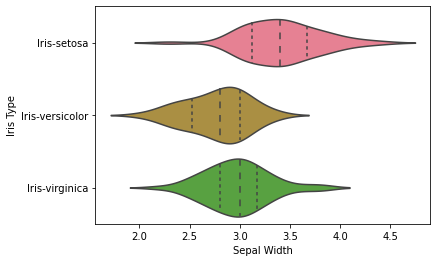

In [ ]:
b = sns.violinplot(y='Iris Type', x='Sepal Width', data=dataset, inner='quartile')

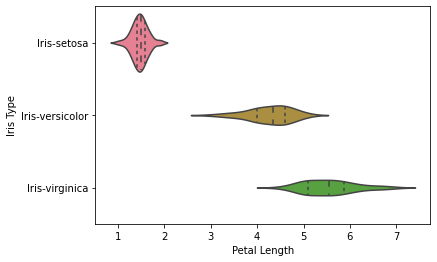

In [ ]:
c = sns.violinplot(y='Iris Type', x='Petal Length', data=dataset, inner='quartile')

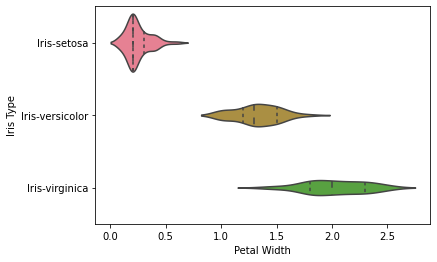

In [ ]:
d = sns.violinplot(y='Iris Type', x='Petal Width', data=dataset, inner='quartile')

*Viz was nicked from a Kaggle article on this dataset


In [ ]:
## Data Preprocessing

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
# Encoding the Dependent Variable
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[6.1 3.  4.6 1.4]
 [7.7 3.  6.1 2.3]
 [5.6 2.5 3.9 1.1]
 [6.4 2.8 5.6 2.1]
 [5.8 2.8 5.1 2.4]
 [5.3 3.7 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [5.2 3.4 1.4 0.2]
 [6.5 2.8 4.6 1.5]
 [6.7 2.5 5.8 1.8]
 [6.8 3.  5.5 2.1]
 [5.1 3.5 1.4 0.3]
 [6.  2.2 5.  1.5]
 [6.3 2.9 5.6 1.8]
 [6.6 2.9 4.6 1.3]
 [7.7 2.6 6.9 2.3]
 [5.7 3.8 1.7 0.3]
 [5.  3.6 1.4 0.2]
 [4.8 3.  1.4 0.3]
 [5.2 2.7 3.9 1.4]
 [5.1 3.4 1.5 0.2]
 [5.5 3.5 1.3 0.2]
 [7.7 3.8 6.7 2.2]
 [6.9 3.1 5.4 2.1]
 [7.3 2.9 6.3 1.8]
 [6.4 2.8 5.6 2.2]
 [6.2 2.8 4.8 1.8]
 [6.  3.4 4.5 1.6]
 [7.7 2.8 6.7 2. ]
 [5.7 3.  4.2 1.2]
 [4.8 3.4 1.6 0.2]
 [5.7 2.5 5.  2. ]
 [6.3 2.7 4.9 1.8]
 [4.8 3.  1.4 0.1]
 [4.7 3.2 1.3 0.2]
 [6.5 3.  5.8 2.2]
 [4.6 3.4 1.4 0.3]
 [6.1 3.  4.9 1.8]
 [6.5 3.2 5.1 2. ]
 [6.7 3.1 4.4 1.4]
 [5.7 2.8 4.5 1.3]
 [6.7 3.3 5.7 2.5]
 [6.  3.  4.8 1.8]
 [5.1 3.8 1.6 0.2]
 [6.  2.2 4.  1. ]
 [6.4 2.9 4.3 1.3]
 [6.5 3.  5.5 1.8]
 [5.  2.3 3.3 1. ]
 [6.3 3.3 6.  2.5]
 [5.5 2.5 4.  1.3]
 [5.4 3.7 1.5 0.2]
 [4.9 3.1 1.5 0.1]
 [5.2 4.1 1.

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 0:4] = sc.fit_transform(X_train[:, 0:4])
X_test[:, 0:4] = sc.transform(X_test[:, 0:4])
print(X_train)
print(X_test)

[[ 0.31553662 -0.03612186  0.44748582  0.2345312 ]
 [ 2.2449325  -0.03612186  1.29803965  1.39642889]
 [-0.2873996  -1.240184    0.0505607  -0.15276803]
 [ 0.67729835 -0.51774672  1.01452171  1.13822941]
 [-0.04622511 -0.51774672  0.73100376  1.52552864]
 [-0.64916132  1.64956512 -1.31032543 -1.31466572]
 [-0.40798684 -1.72180885  0.10726429  0.10543146]
 [-0.76974857  0.92712784 -1.36702901 -1.31466572]
 [ 0.79788559 -0.51774672  0.44748582  0.36363094]
 [ 1.03906007 -1.240184    1.12792888  0.75093018]
 [ 1.15964732 -0.03612186  0.95781812  1.13822941]
 [-0.89033581  1.16794027 -1.36702901 -1.18556598]
 [ 0.19494938 -1.96262128  0.67430017  0.36363094]
 [ 0.5567111  -0.27693429  1.01452171  0.75093018]
 [ 0.91847283 -0.27693429  0.44748582  0.10543146]
 [ 2.2449325  -0.99937157  1.75166836  1.39642889]
 [-0.16681235  1.89037755 -1.19691825 -1.18556598]
 [-1.01092305  1.4087527  -1.36702901 -1.31466572]
 [-1.25209754 -0.03612186 -1.36702901 -1.18556598]
 [-0.76974857 -0.75855914  0.05

In [ ]:
# Training Naive Bayes model on the training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# Making the confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


0.9666666666666667

Naive bayes achieves an accuracy of 96.67%.
Due to having very little data, decided to use k-fold cross validation to add some robustness to the model.

In [ ]:
# Applying k-Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 5)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 94.17 %
Standard Deviation: 3.33 %


cross val provides with a more reliable figure of accuracy at 94.17% being the average across the five iterations.
